<a href="https://colab.research.google.com/github/ShivamBhosale/Tensorflow/blob/master/TF_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-09-26 14:27:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  22.3MB/s    in 8.6s    

2020-09-26 14:27:31 (22.3 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-09-26 14:27:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir=os.path.join('/tmp/rps/rock')
paper_dir=os.path.join('/tmp/rps/paper')
scissor_dir=os.path.join('/tmp/rps/scissors')

In [4]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissor_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [5]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissor_dir)
print(scissors_files[:10])

['rock02-051.png', 'rock05ck01-051.png', 'rock02-006.png', 'rock05ck01-105.png', 'rock01-116.png', 'rock03-101.png', 'rock07-k03-025.png', 'rock02-069.png', 'rock05ck01-067.png', 'rock06ck02-077.png']
['paper03-012.png', 'paper03-117.png', 'paper05-080.png', 'paper03-003.png', 'paper01-010.png', 'paper02-011.png', 'paper04-114.png', 'paper01-006.png', 'paper04-033.png', 'paper05-021.png']
['scissors02-012.png', 'testscissors01-002.png', 'scissors04-068.png', 'testscissors01-101.png', 'scissors04-070.png', 'scissors02-041.png', 'scissors01-075.png', 'scissors04-049.png', 'scissors02-095.png', 'scissors03-077.png']


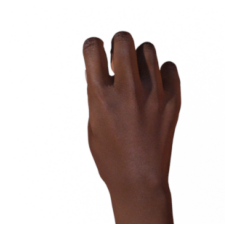

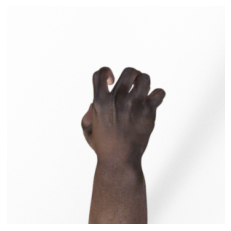

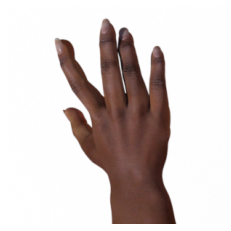

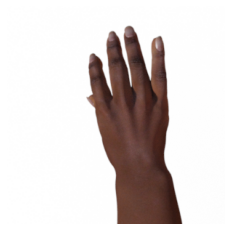

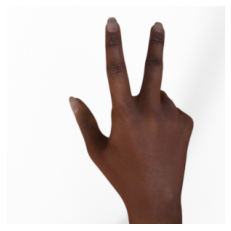

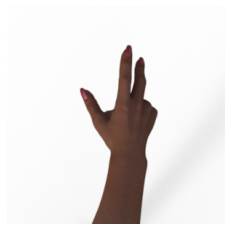

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissor_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [8]:
Training_Dir='/tmp/rps'

In [9]:
training_datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest'

)

In [14]:
Validation_Dir='/tmp/rps-test-set/'

In [11]:
validation_datgen=ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_generator=training_datagen.flow_from_directory(
    Training_Dir,
    class_mode='categorical',
    target_size=(150,150),
    batch_size=126
)

Found 2520 images belonging to 3 classes.


In [15]:
validation_generator = validation_datgen.flow_from_directory( 
  Validation_Dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 372 images belonging to 3 classes.


<h2>Create the Neural Network

In [17]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=512,activation='relu'),
                                  tf.keras.layers.Dense(units=3,activation='softmax')

])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

<h2>Compile the model</h2>

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

<h2>Fit the model and save it</h2>

In [20]:
model_fit=model.fit(train_generator,validation_data=validation_generator,epochs=25,steps_per_epoch=20,verbose=1,validation_steps=3)
model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 22s 1s/step - loss: 1.3759 - accuracy: 0.3472 - val_loss: 1.0845 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 22s 1s/step - loss: 1.0931 - accuracy: 0.4028 - val_loss: 1.0265 - val_accuracy: 0.5511
Epoch 3/25
20/20 [==============================] - 22s 1s/step - loss: 1.0162 - accuracy: 0.4956 - val_loss: 0.6113 - val_accuracy: 0.7984
Epoch 4/25
20/20 [==============================] - 22s 1s/step - loss: 0.8235 - accuracy: 0.6103 - val_loss: 0.4550 - val_accuracy: 0.9220
Epoch 5/25
20/20 [==============================] - 22s 1s/step - loss: 0.6827 - accuracy: 0.6782 - val_loss: 0.4831 - val_accuracy: 0.6720
Epoch 6/25
20/20 [==============================] - 22s 1s/step - loss: 0.6824 - accuracy: 0.7099 - val_loss: 0.6405 - val_accuracy: 0.6371
Epoch 7/25
20/20 [==============================] - 21s 1s/step - loss: 0.5905 - accuracy: 0.7540 - val_loss: 0.4755 - val_accuracy: 0.8925
Epoch 8/25
20/20 [==

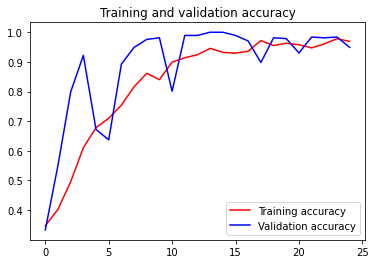

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving palm.jpg to palm.jpg
Saving r2.jpg to r2 (4).jpg
Saving r45.jpg to r45 (1).jpg
Saving s.jpg to s (6).jpg
palm.jpg
[[1. 0. 0.]]


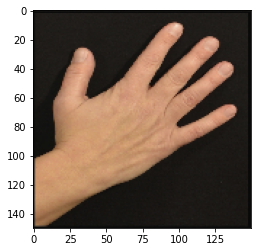

r2.jpg
[[0. 1. 0.]]


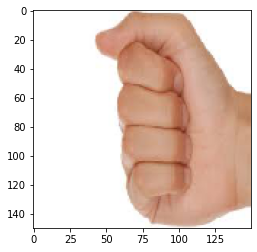

r45.jpg
[[0. 1. 0.]]


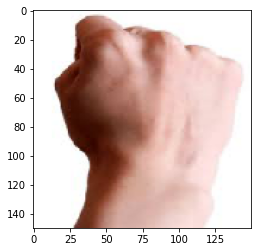

s.jpg
[[0. 0. 1.]]


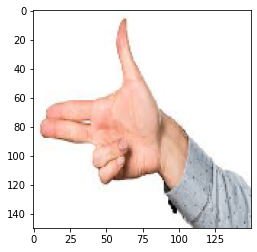

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  plt.imshow(img)
  plt.show()